In [41]:
import os
import sys

sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.gridspec import GridSpec
from matplotlib.image import imread

from utils.dataio import load_log, load_mat
from utils.visualization import *
from utils.simulations import *
from kwave.ktransducer import kWaveGrid

data_path = '../data/'
results_path = '../results/'
RESULTS_DIR = '../results_new/'

In [42]:
config = load_config('../config.yaml')
bps, tps_phantom, tps_invivo = config['basic_params'], config['phantom'], config['in_vivo']

In [43]:
kgrid = kWaveGrid([tps_phantom['Nx'], tps_phantom['Ny']], [bps['dx'], bps['dy']])
XX, YY = np.meshgrid(kgrid.x_vec, kgrid.y_vec)
SOS_dual_phantom = np.ones((tps_phantom['Nx'], tps_phantom['Ny'])) * get_water_sos(tps_phantom['T'])
SOS_dual_phantom[XX**2 + YY**2 <= tps_phantom['R_body']**2] = 1520.0

kgrid = kWaveGrid([tps_invivo['Nx'], tps_invivo['Ny']], [bps['dx'], bps['dy']])
XX, YY = np.meshgrid(kgrid.x_vec, kgrid.y_vec)
SOS_dual_invivo = np.ones((tps_invivo['Nx'], tps_invivo['Ny'])) * get_water_sos(tps_invivo['T'])
SOS_dual_invivo[XX**2 + YY**2 <= tps_invivo['R_body']**2] = 1560.0

### Load Images

In [44]:
lam_tv_phantom = 1e-4
lam_tv_invivo = 5e-5
n_delays = 16
batch_size = 64
hls, hfs = 0, 128
lr_gop = 0.1
lr_nf = 5e-3

In [45]:
# Leaf Phantom.
IP_das_phantom = load_mat(os.path.join(RESULTS_DIR, 'phantom', 'DAS', 'v_das=1505.0m·s⁻¹', 'IP_rec.mat'))
IP_dual_das_phantom = load_mat(os.path.join(RESULTS_DIR, 'phantom', 'Dual-SOS_DAS', 'v_body=1520.0m·s⁻¹', 'IP_rec.mat'))
IP_apact_phantom = load_mat(os.path.join(RESULTS_DIR, 'phantom', 'APACT', f'{n_delays}delays', 'IP_rec.mat'))
IP_pg_phantom = load_mat(os.path.join(RESULTS_DIR, 'phantom', 'PG', f'{n_delays}delays_TV={lam_tv_phantom:.1e}_10epochs_bs={batch_size}_lr={lr_gop:.1e}', 'IP_rec.mat'))
IP_nf_apact_phantom = load_mat(os.path.join(RESULTS_DIR, 'phantom', 'NF-APACT', f'{n_delays}delays_{hls}lyrs_{hfs}fts_10epochs_bs={batch_size}_lr={lr_nf:.1e}', 'IP_rec.mat'))

# SOS_dual_phantom = load_mat(os.path.join(data_path, 'SOS_phantom_dual.mat'))
SOS_APACT_phamtom = load_mat(os.path.join(RESULTS_DIR, 'phantom', 'APACT', f'{n_delays}delays', 'SOS_rec.mat'))
SOS_pg_phantom = load_mat(os.path.join(RESULTS_DIR, 'phantom', 'PG', f'{n_delays}delays_TV={lam_tv_phantom:.1e}_10epochs_bs={batch_size}_lr={lr_gop:.1e}', 'SOS_rec.mat'))
SOS_nf_apact_phantom = load_mat(os.path.join(RESULTS_DIR, 'phantom', 'NF-APACT', f'{n_delays}delays_{hls}lyrs_{hfs}fts_10epochs_bs={batch_size}_lr={lr_nf:.1e}', 'SOS_rec.mat'))

img_phantom = imread('leaf_phantom.jpg')

t_das_phantom = load_log(os.path.join(RESULTS_DIR, 'phantom', 'DAS', 'v_das=1505.0m·s⁻¹', 'log.json'))['time']
t_dual_das_phantom = load_log(os.path.join(RESULTS_DIR, 'phantom', 'Dual-SOS_DAS', 'v_body=1520.0m·s⁻¹', 'log.json'))['time']
t_apact_phantom = load_log(os.path.join(RESULTS_DIR, 'phantom', 'APACT', f'{n_delays}delays', 'log.json'))['time']
t_pg_phantom = load_log(os.path.join(RESULTS_DIR, 'phantom', 'PG', f'{n_delays}delays_TV={lam_tv_phantom:.1e}_10epochs_bs={batch_size}_lr={lr_gop:.1e}', 'log.json'))['time']
t_nf_apact_phantom = load_log(os.path.join(RESULTS_DIR, 'phantom', 'NF-APACT', f'{n_delays}delays_{hls}lyrs_{hfs}fts_10epochs_bs={batch_size}_lr={lr_nf:.1e}', 'log.json'))['time']

# In vivo Mouse Liver.
IP_das_invivo = load_mat(os.path.join(RESULTS_DIR, 'in_vivo', 'DAS', 'v_das=1517.0m·s⁻¹', 'IP_rec.mat'))
IP_dual_das_invivo = load_mat(os.path.join(RESULTS_DIR, 'in_vivo', 'Dual-SOS_DAS', 'v_body=1560.0m·s⁻¹', 'IP_rec.mat'))
IP_apact_invivo = load_mat(os.path.join(RESULTS_DIR, 'in_vivo', 'APACT', f'{n_delays}delays', 'IP_rec.mat'))
IP_pg_invivo = load_mat(os.path.join(RESULTS_DIR, 'in_vivo', 'PG', f'{n_delays}delays_TV={lam_tv_invivo:.1e}_10epochs_bs={batch_size}_lr={lr_gop:.1e}', 'IP_rec.mat'))
IP_nf_apact_invivo = load_mat(os.path.join(RESULTS_DIR, 'in_vivo', 'NF-APACT', f'{n_delays}delays_{hls}lyrs_{hfs}fts_10epochs_bs={batch_size}_lr={lr_nf:.1e}', 'IP_rec.mat'))

# SOS_dual_invivo = load_mat(os.path.join(data_path, 'SOS_invivo_dual.mat'))
SOS_APACT_invivo = load_mat(os.path.join(RESULTS_DIR, 'in_vivo', 'APACT', f'{n_delays}delays', 'SOS_rec.mat'))
SOS_pg_invivo = load_mat(os.path.join(RESULTS_DIR, 'in_vivo', 'PG', f'{n_delays}delays_TV={lam_tv_invivo:.1e}_10epochs_bs={batch_size}_lr={lr_gop:.1e}', 'SOS_rec.mat'))
SOS_nf_apact_invivo = load_mat(os.path.join(RESULTS_DIR, 'in_vivo', 'NF-APACT', f'{n_delays}delays_{hls}lyrs_{hfs}fts_10epochs_bs={batch_size}_lr={lr_nf:.1e}', 'SOS_rec.mat'))

img_mouse = imread('mouse.jpg')
img_mouse = img_mouse[24:1024,16:1016,:]

t_das_invivo = load_log(os.path.join(RESULTS_DIR, 'in_vivo', 'DAS', 'v_das=1517.0m·s⁻¹', 'log.json'))['time']
t_dual_das_invivo = load_log(os.path.join(RESULTS_DIR, 'in_vivo', 'Dual-SOS_DAS', 'v_body=1560.0m·s⁻¹', 'log.json'))['time']
t_apact_invivo = load_log(os.path.join(RESULTS_DIR, 'in_vivo', 'APACT', f'{n_delays}delays', 'log.json'))['time']
t_pg_invivo = load_log(os.path.join(RESULTS_DIR, 'in_vivo', 'PG', f'{n_delays}delays_TV={lam_tv_invivo:.1e}_10epochs_bs={batch_size}_lr={lr_gop:.1e}', 'log.json'))['time']
t_nf_apact_invivo = load_log(os.path.join(RESULTS_DIR, 'in_vivo', 'NF-APACT', f'{n_delays}delays_{hls}lyrs_{hfs}fts_10epochs_bs={batch_size}_lr={lr_nf:.1e}', 'log.json'))['time']

In [46]:
# IP_dual_das_invivo = (IP_dual_das_invivo-IP_dual_das_invivo.mean())/ IP_dual_das_invivo.std()
# for img in [IP_dual_das_invivo, IP_apact_invivo, IP_nf_apact_invivo]:
#     print(img.min(), img.max(), img.mean(), img.std())

In [47]:
[IP_das_phantom, IP_dual_das_phantom, IP_apact_phantom, IP_pg_phantom, IP_nf_apact_phantom] = \
    [standardize(img) for img in [IP_das_phantom, IP_dual_das_phantom, IP_apact_phantom, IP_pg_phantom, IP_nf_apact_phantom]]
[IP_das_invivo, IP_dual_das_invivo, IP_apact_invivo, IP_pg_invivo, IP_nf_apact_invivo] = \
    [standardize(img) for img in [IP_das_invivo, IP_dual_das_invivo, IP_apact_invivo, IP_pg_invivo, IP_nf_apact_invivo]]

### Create Figure

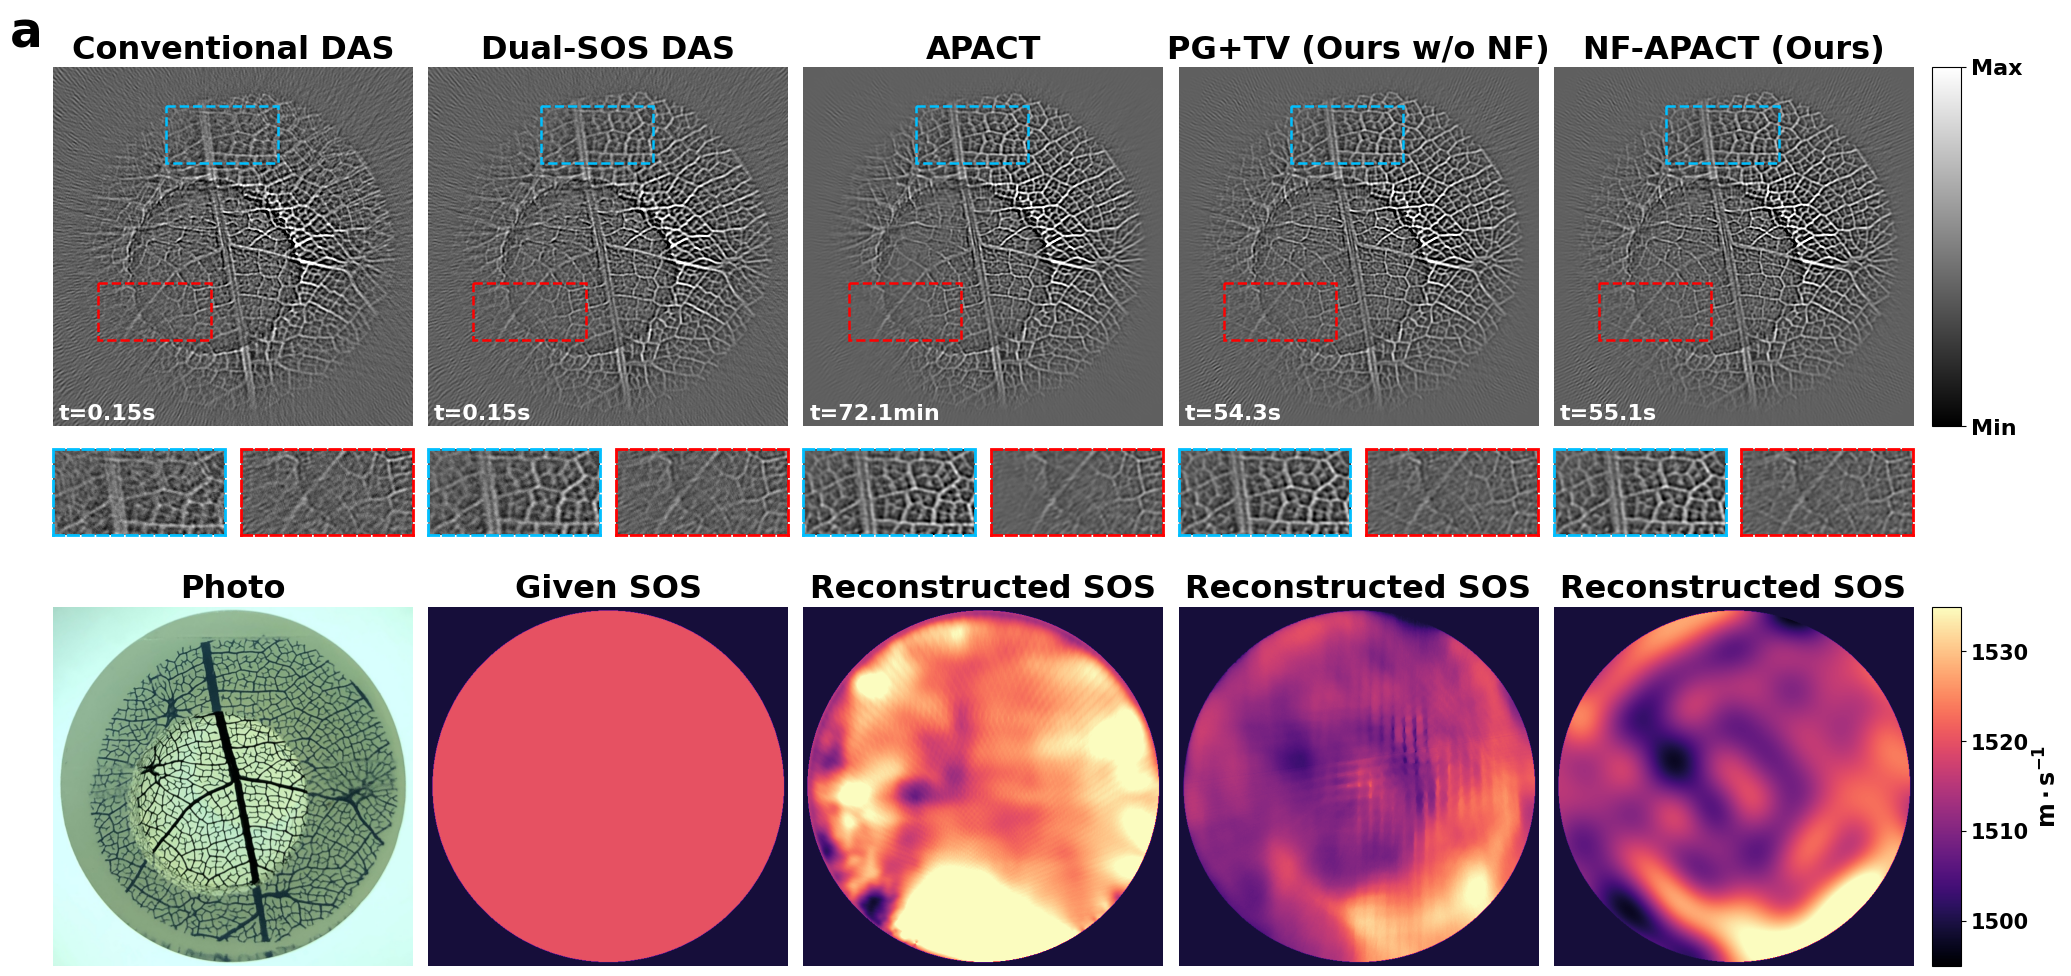

In [48]:
patches = [(70, 200, 100, 200, 'deepskyblue'), (385, 80, 100, 200, 'red')]

fig = plt.figure(figsize=(24, 12))
gs = GridSpec(19, 20)
norm = Normalize(vmax=5, vmin=-3)
norm_SOS = Normalize(vmax=1535, vmin=1495)
for idx, (img, method, time, SOS, SOS_title) in enumerate(zip([IP_das_phantom, IP_dual_das_phantom, IP_apact_phantom, IP_pg_phantom, IP_nf_apact_phantom],
                                                              ['Conventional DAS', 'Dual-SOS DAS', 'APACT', 'PG+TV (Ours w/o NF)', 'NF-APACT (Ours)'],
                                                              ['t={:.2f}s'.format(t_das_phantom), 't={:.2f}s'.format(t_dual_das_phantom), 't={:.1f}min'.format(t_apact_phantom/60), 't={:.1f}s'.format(t_pg_phantom), 't={:.1f}s'.format(t_nf_apact_phantom)],
                                                              [None, SOS_dual_phantom, SOS_APACT_phamtom, SOS_pg_phantom, SOS_nf_apact_phantom],
                                                              ['Photo', 'Given SOS', 'Reconstructed SOS', 'Reconstructed SOS', 'Reconstructed SOS'])):
    ax = plt.subplot(gs[0:8,idx*4:(idx+1)*4])
    plt.title(method, fontsize=23, fontweight='semibold')
    plt.axis('off')
    if idx == 0:
        plt.title('a', loc='left', x=-0.12, y=1.03, fontsize=35, fontweight='semibold', color='black')
    plt.imshow(img, cmap='gray', norm=norm)
    plt.text(s=time, x=10, y=628, fontweight='semibold', fontsize=16, color='white')
    if idx == 4:
        cax = fig.add_axes([ax.get_position().x1+8e-3, ax.get_position().y0, 1.2e-2, ax.get_position().height])
        cb = plt.colorbar(cax=cax, norm=norm)
        cb.set_ticks([5, -3])
        cb.set_ticklabels(['Max', 'Min'], fontsize=16, fontweight='bold')
    
    for k, (x, y, h, w, color) in enumerate(patches):
        rect = plt.Rectangle((y, x), w, h, fill=False, edgecolor=color, linewidth=1.8, linestyle='--')
        ax.add_patch(rect)
        ax2 = plt.subplot(gs[8:10,idx*4+k*2:idx*4+(k+1)*2])
        plt.imshow(img[x:x+h, y:y+w], cmap='gray', norm=norm)
        plt.xticks([])
        plt.yticks([])
        for loc in ['bottom', 'top', 'left', 'right']:
            ax2.spines[loc].set_color(color)
            ax2.spines[loc].set_linewidth(2)
            ax2.spines[loc].set_linestyle('--')

    ax = plt.subplot(gs[11:19,idx*4:(idx+1)*4])
    plt.title(SOS_title, fontsize=23, fontweight='semibold')
    plt.axis('off')
    if idx == 0:
        plt.imshow(img_phantom, cmap='gray')
        continue
    plt.imshow(SOS, cmap='magma', norm=norm_SOS)
    if idx == 4:
        cax = fig.add_axes([ax.get_position().x1+8e-3, ax.get_position().y0, 1.2e-2, ax.get_position().height])
        cb = plt.colorbar(cax=cax, norm=norm_SOS)
        cb.set_ticks([1500, 1510, 1520, 1530])
        cb.set_ticklabels(['1500', '1510', '1520', '1530'], fontsize=15, fontweight='bold')
        cb.set_label('$\mathbf{m \cdot s^{-1}}$', fontsize=17)
    
plt.savefig('figure_phantom.png', bbox_inches='tight', dpi=128)

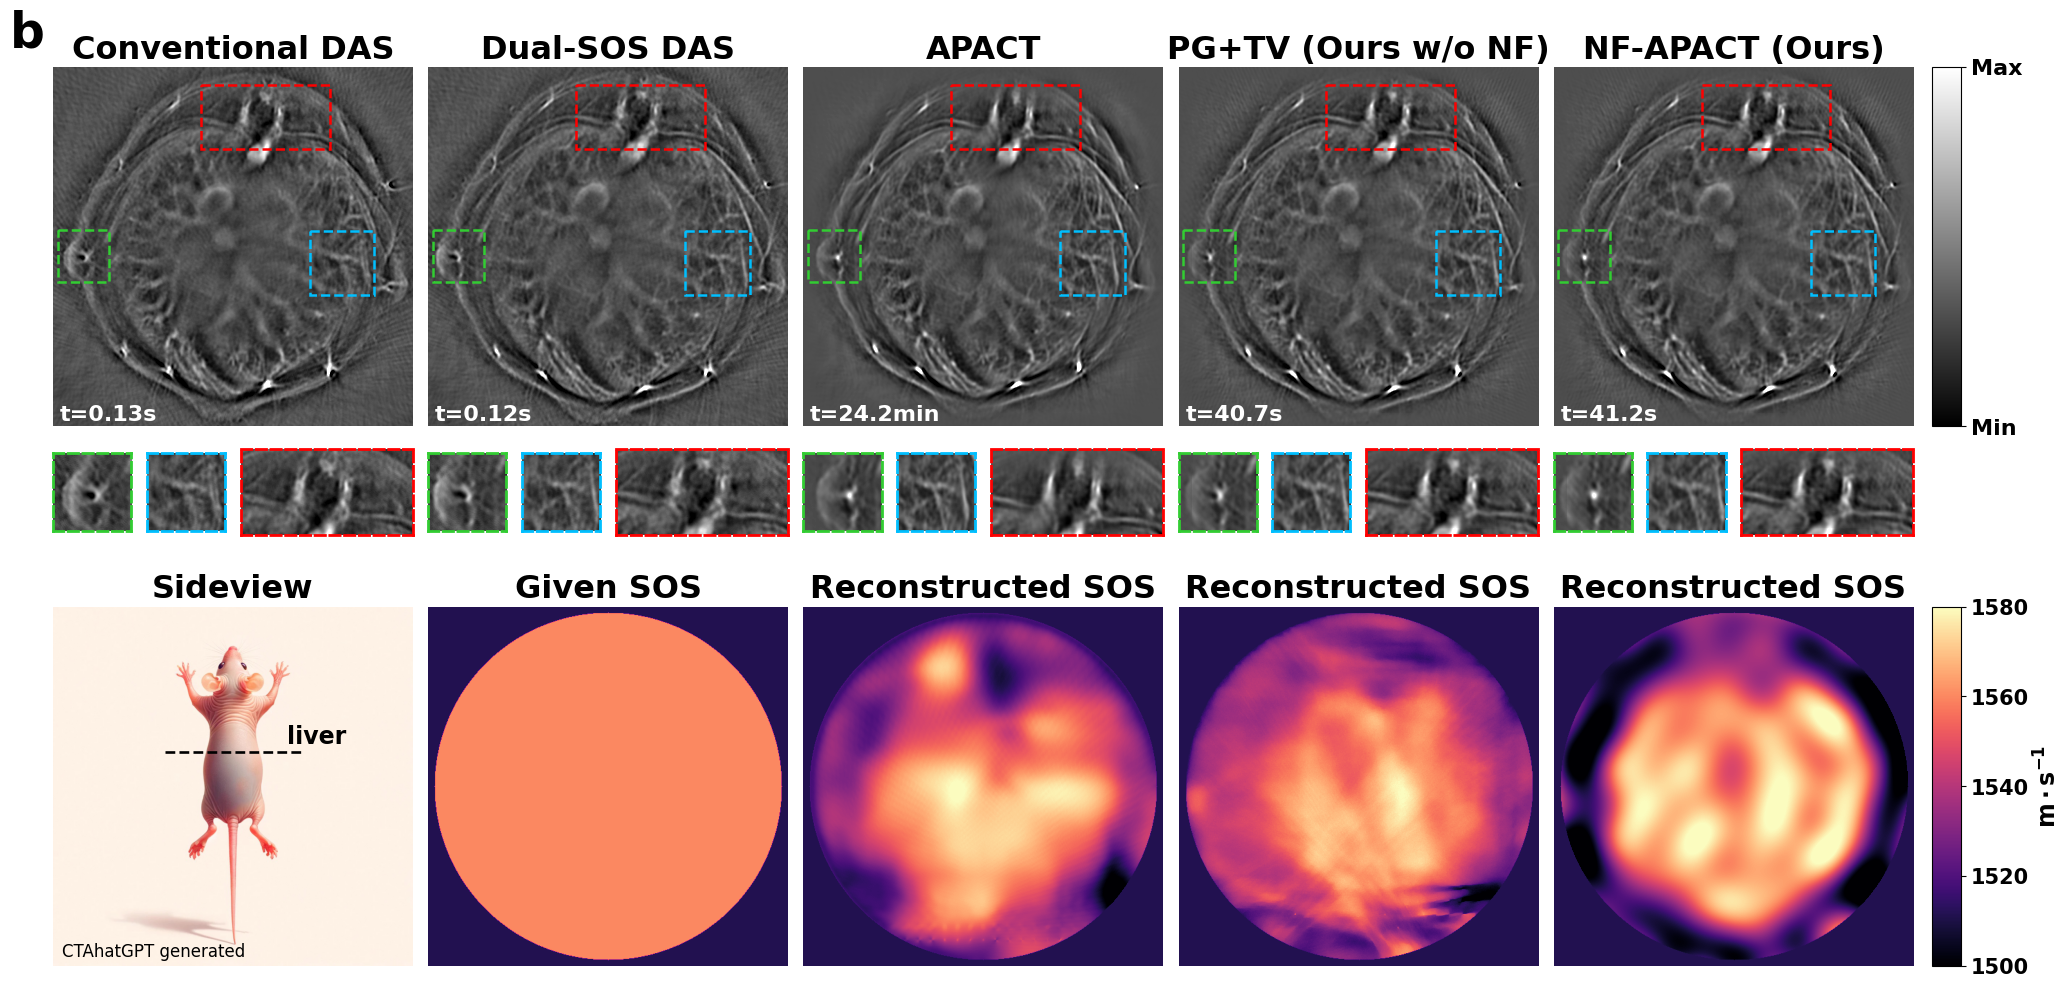

In [49]:
patches = [(254, 7, 80, 80, 'limegreen'), (255, 400, 100, 100, 'deepskyblue'), (28, 230, 100, 200, 'red')]#(160, 130, 100, 200, 'red')]
# patches = [(254, 7, 80, 80, 'limegreen'), (255, 400, 100, 100,'deepskyblue'), (30, 210, 100, 200, 'red')]
# (255, 400, 100, 100,'deepskyblue')

fig = plt.figure(figsize=(24, 12))
gs = GridSpec(19, 20)
norm = Normalize(vmax=8, vmin=-3.5)
norm_SOS = Normalize(vmax=1580, vmin=1500)
for idx, (img, method, time, SOS, SOS_title) in enumerate(zip([IP_das_invivo, IP_dual_das_invivo, IP_apact_invivo, IP_pg_invivo, IP_nf_apact_invivo],
                                                              ['Conventional DAS', 'Dual-SOS DAS', 'APACT', 'PG+TV (Ours w/o NF)', 'NF-APACT (Ours)'],
                                                              ['t={:.2f}s'.format(t_das_invivo), 't={:.2f}s'.format(t_dual_das_invivo), 't={:.1f}min'.format(t_apact_invivo/60), 't={:.1f}s'.format(t_pg_invivo), 't={:.1f}s'.format(t_nf_apact_invivo)],
                                                              [None, SOS_dual_invivo, SOS_APACT_invivo, SOS_pg_invivo, SOS_nf_apact_invivo],
                                                              ['Sideview', 'Given SOS', 'Reconstructed SOS', 'Reconstructed SOS', 'Reconstructed SOS'])):
    ax = plt.subplot(gs[0:8,idx*4:(idx+1)*4])
    plt.title(method, fontsize=23, fontweight='semibold')
    plt.axis('off')
    if idx == 0:
        plt.title('b', loc='left', x=-0.12, y=1.03, fontsize=35, fontweight='semibold', color='black')
    plt.imshow(img, cmap='gray', norm=norm)
    plt.text(s=time, x=10, y=550, fontweight='semibold', fontsize=16, color='white')
    if idx == 4:
        cax = fig.add_axes([ax.get_position().x1+8e-3, ax.get_position().y0, 1.2e-2, ax.get_position().height])
        cb = plt.colorbar(cax=cax, norm=norm)
        cb.set_ticks([8, -3.5])
        cb.set_ticklabels(['Max', 'Min'], fontsize=16, fontweight='bold')
    
    for k, (x, y, h, w, color) in enumerate(patches):
        rect = plt.Rectangle((y, x), w, h, fill=False, edgecolor=color, linewidth=1.8, linestyle='--')
        ax.add_patch(rect)
        ax2 = plt.subplot(gs[8:10,idx*4+k:idx*4+k+1+(k==2)])
        plt.imshow(img[x:x+h, y:y+w], cmap='gray', norm=norm)
        plt.xticks([])
        plt.yticks([])
        for loc in ['bottom', 'top', 'left', 'right']:
            ax2.spines[loc].set_color(color)
            ax2.spines[loc].set_linewidth(2)
            ax2.spines[loc].set_linestyle('--')

    ax = plt.subplot(gs[11:19,idx*4:(idx+1)*4])
    plt.title(SOS_title, fontsize=23, fontweight='semibold')
    plt.axis('off')
    if idx == 0:
        plt.imshow(img_mouse)
        ax.hlines([405], 310, 690, colors='black', linestyles='--', linewidth=1.9)
        plt.text(x=650, y=380, s='liver', fontsize=17, color='black', fontweight='bold')
        plt.text(x=25, y=975, s='CTAhatGPT generated', fontsize=12, color='black')
        continue
    plt.imshow(SOS, cmap='magma', norm=norm_SOS)
    if idx == 4:
        cax = fig.add_axes([ax.get_position().x1+8e-3, ax.get_position().y0, 1.2e-2, ax.get_position().height])
        cb = plt.colorbar(cax=cax, norm=norm_SOS)
        cb.set_ticks([1500, 1520, 1540, 1560, 1580])
        cb.set_ticklabels(['1500', '1520', '1540', '1560', '1580'], fontsize=15, fontweight='bold')
        cb.set_label('$\mathbf{m \cdot s^{-1}}$', fontsize=17)
        
plt.savefig('figure_invivo.png', bbox_inches='tight', dpi=128)

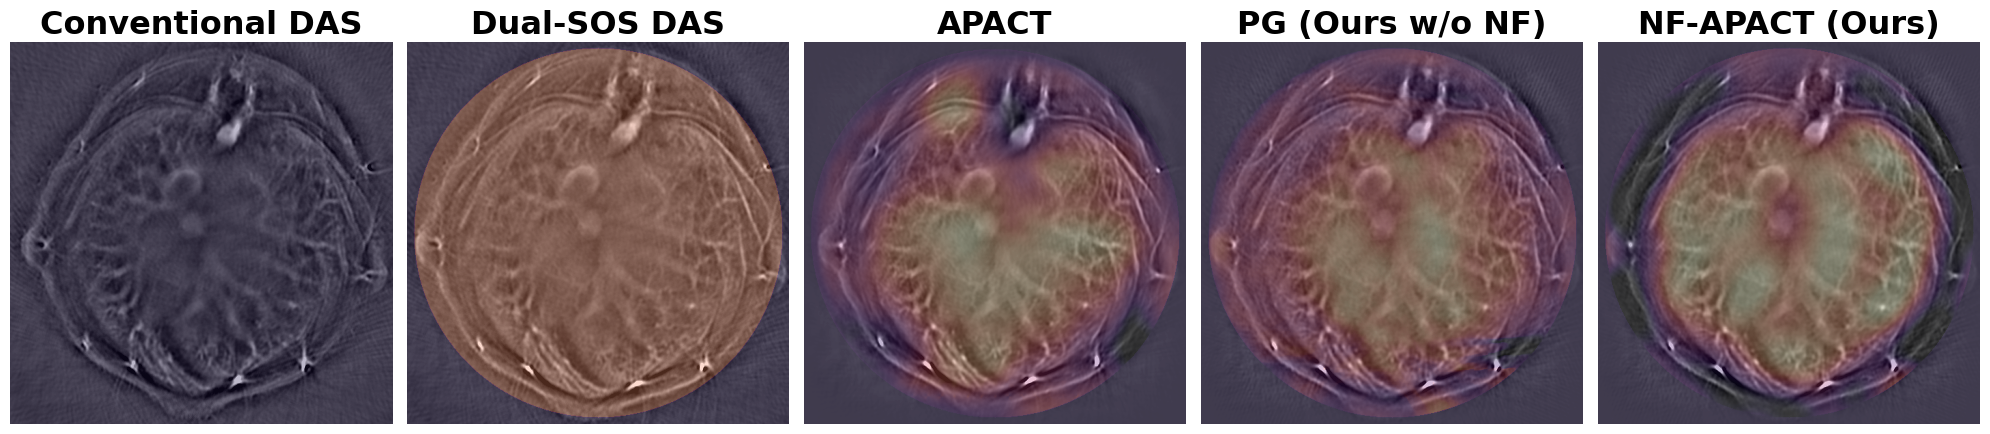

In [51]:
fig = plt.figure(figsize=(20, 4.5))
for idx, (img, method, SOS) in enumerate(zip([IP_das_invivo, IP_dual_das_invivo, IP_apact_invivo, IP_pg_invivo, IP_nf_apact_invivo],
                                             ['Conventional DAS', 'Dual-SOS DAS', 'APACT', 'PG (Ours w/o NF)', 'NF-APACT (Ours)'],
                                             [np.ones_like(SOS_dual_invivo)*1511, SOS_dual_invivo, SOS_APACT_invivo, SOS_pg_invivo, SOS_nf_apact_invivo])):
    ax = plt.subplot(1,5,idx+1)
    plt.title(method, fontsize=23, fontweight='semibold')
    plt.axis('off')
    plt.imshow(img, cmap='gray', norm=norm)
    plt.imshow(SOS, cmap='magma', norm=norm_SOS, alpha=0.3)
plt.tight_layout()
plt.savefig('figure_overlay.png', bbox_inches='tight', dpi=128)